# Task-3 Prediction using Decision Tree Algorithm

# By - Saivineeth 

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [3]:
iris=pd.read_csv('Iris.csv')

In [4]:
iris.drop(['Id'],axis=1,inplace=True)

In [5]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


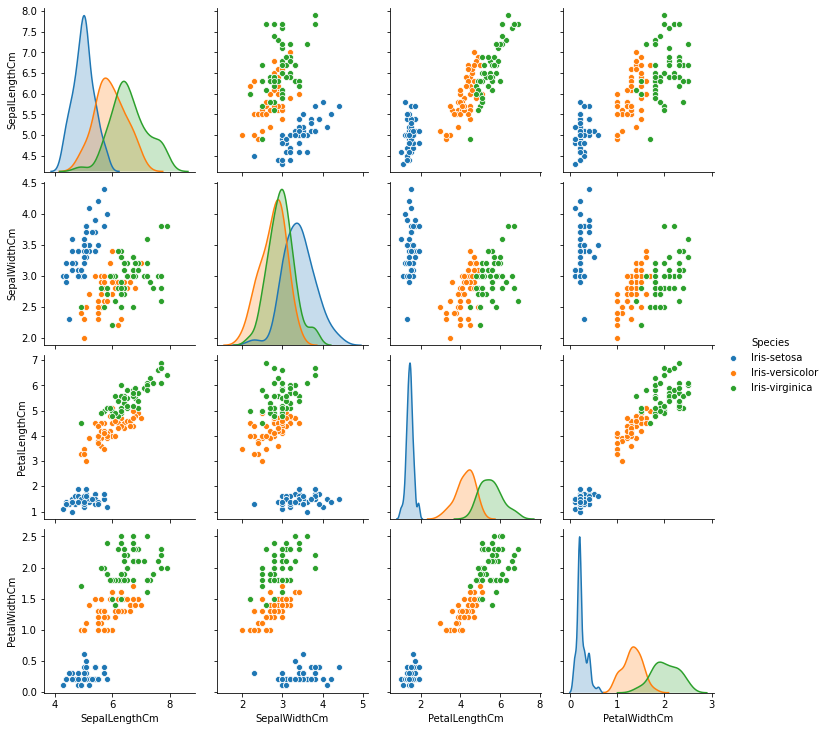

In [6]:
sns.pairplot(iris, hue='Species')

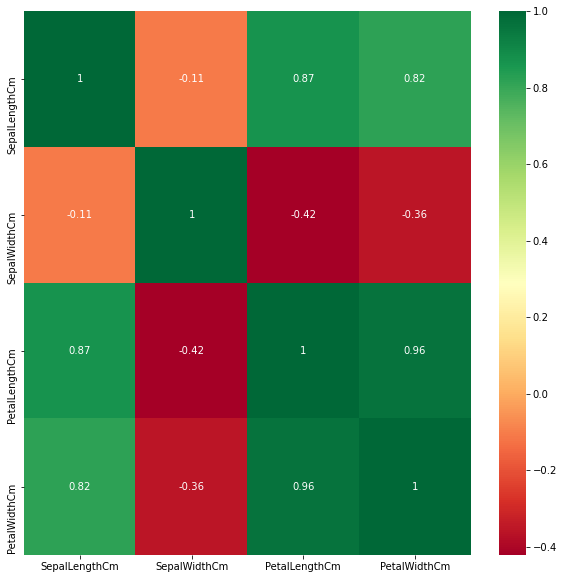

In [18]:
corel=iris.corr()
top_cor_ft=corel.index
plt.figure(figsize=(10,10))
g=sns.heatmap(iris[top_cor_ft].corr(),annot=True,cmap="RdYlGn")

In [21]:
from sklearn import preprocessing  
label_encoder = preprocessing.LabelEncoder() 
iris['Species']= label_encoder.fit_transform(iris['Species']) 
iris['Species'].unique()

array([0, 1, 2])

In [25]:
y=pd.Series(iris.Species)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

In [26]:
x=iris.drop(['Species'],axis=1)

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [28]:
from sklearn.tree import DecisionTreeClassifier
clfr=DecisionTreeClassifier(criterion='entropy',random_state=0)
clfr.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [30]:
y_pred=clfr.predict(x_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [31]:
from sklearn.metrics import accuracy_score,classification_report
print('Accuracy is', round(accuracy_score(y_pred, y_test)*100, 2))
print(classification_report(y_pred, y_test))

Accuracy is 97.78
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      1.00      0.97        17
           2       1.00      0.92      0.96        12

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



In [32]:
ft_columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

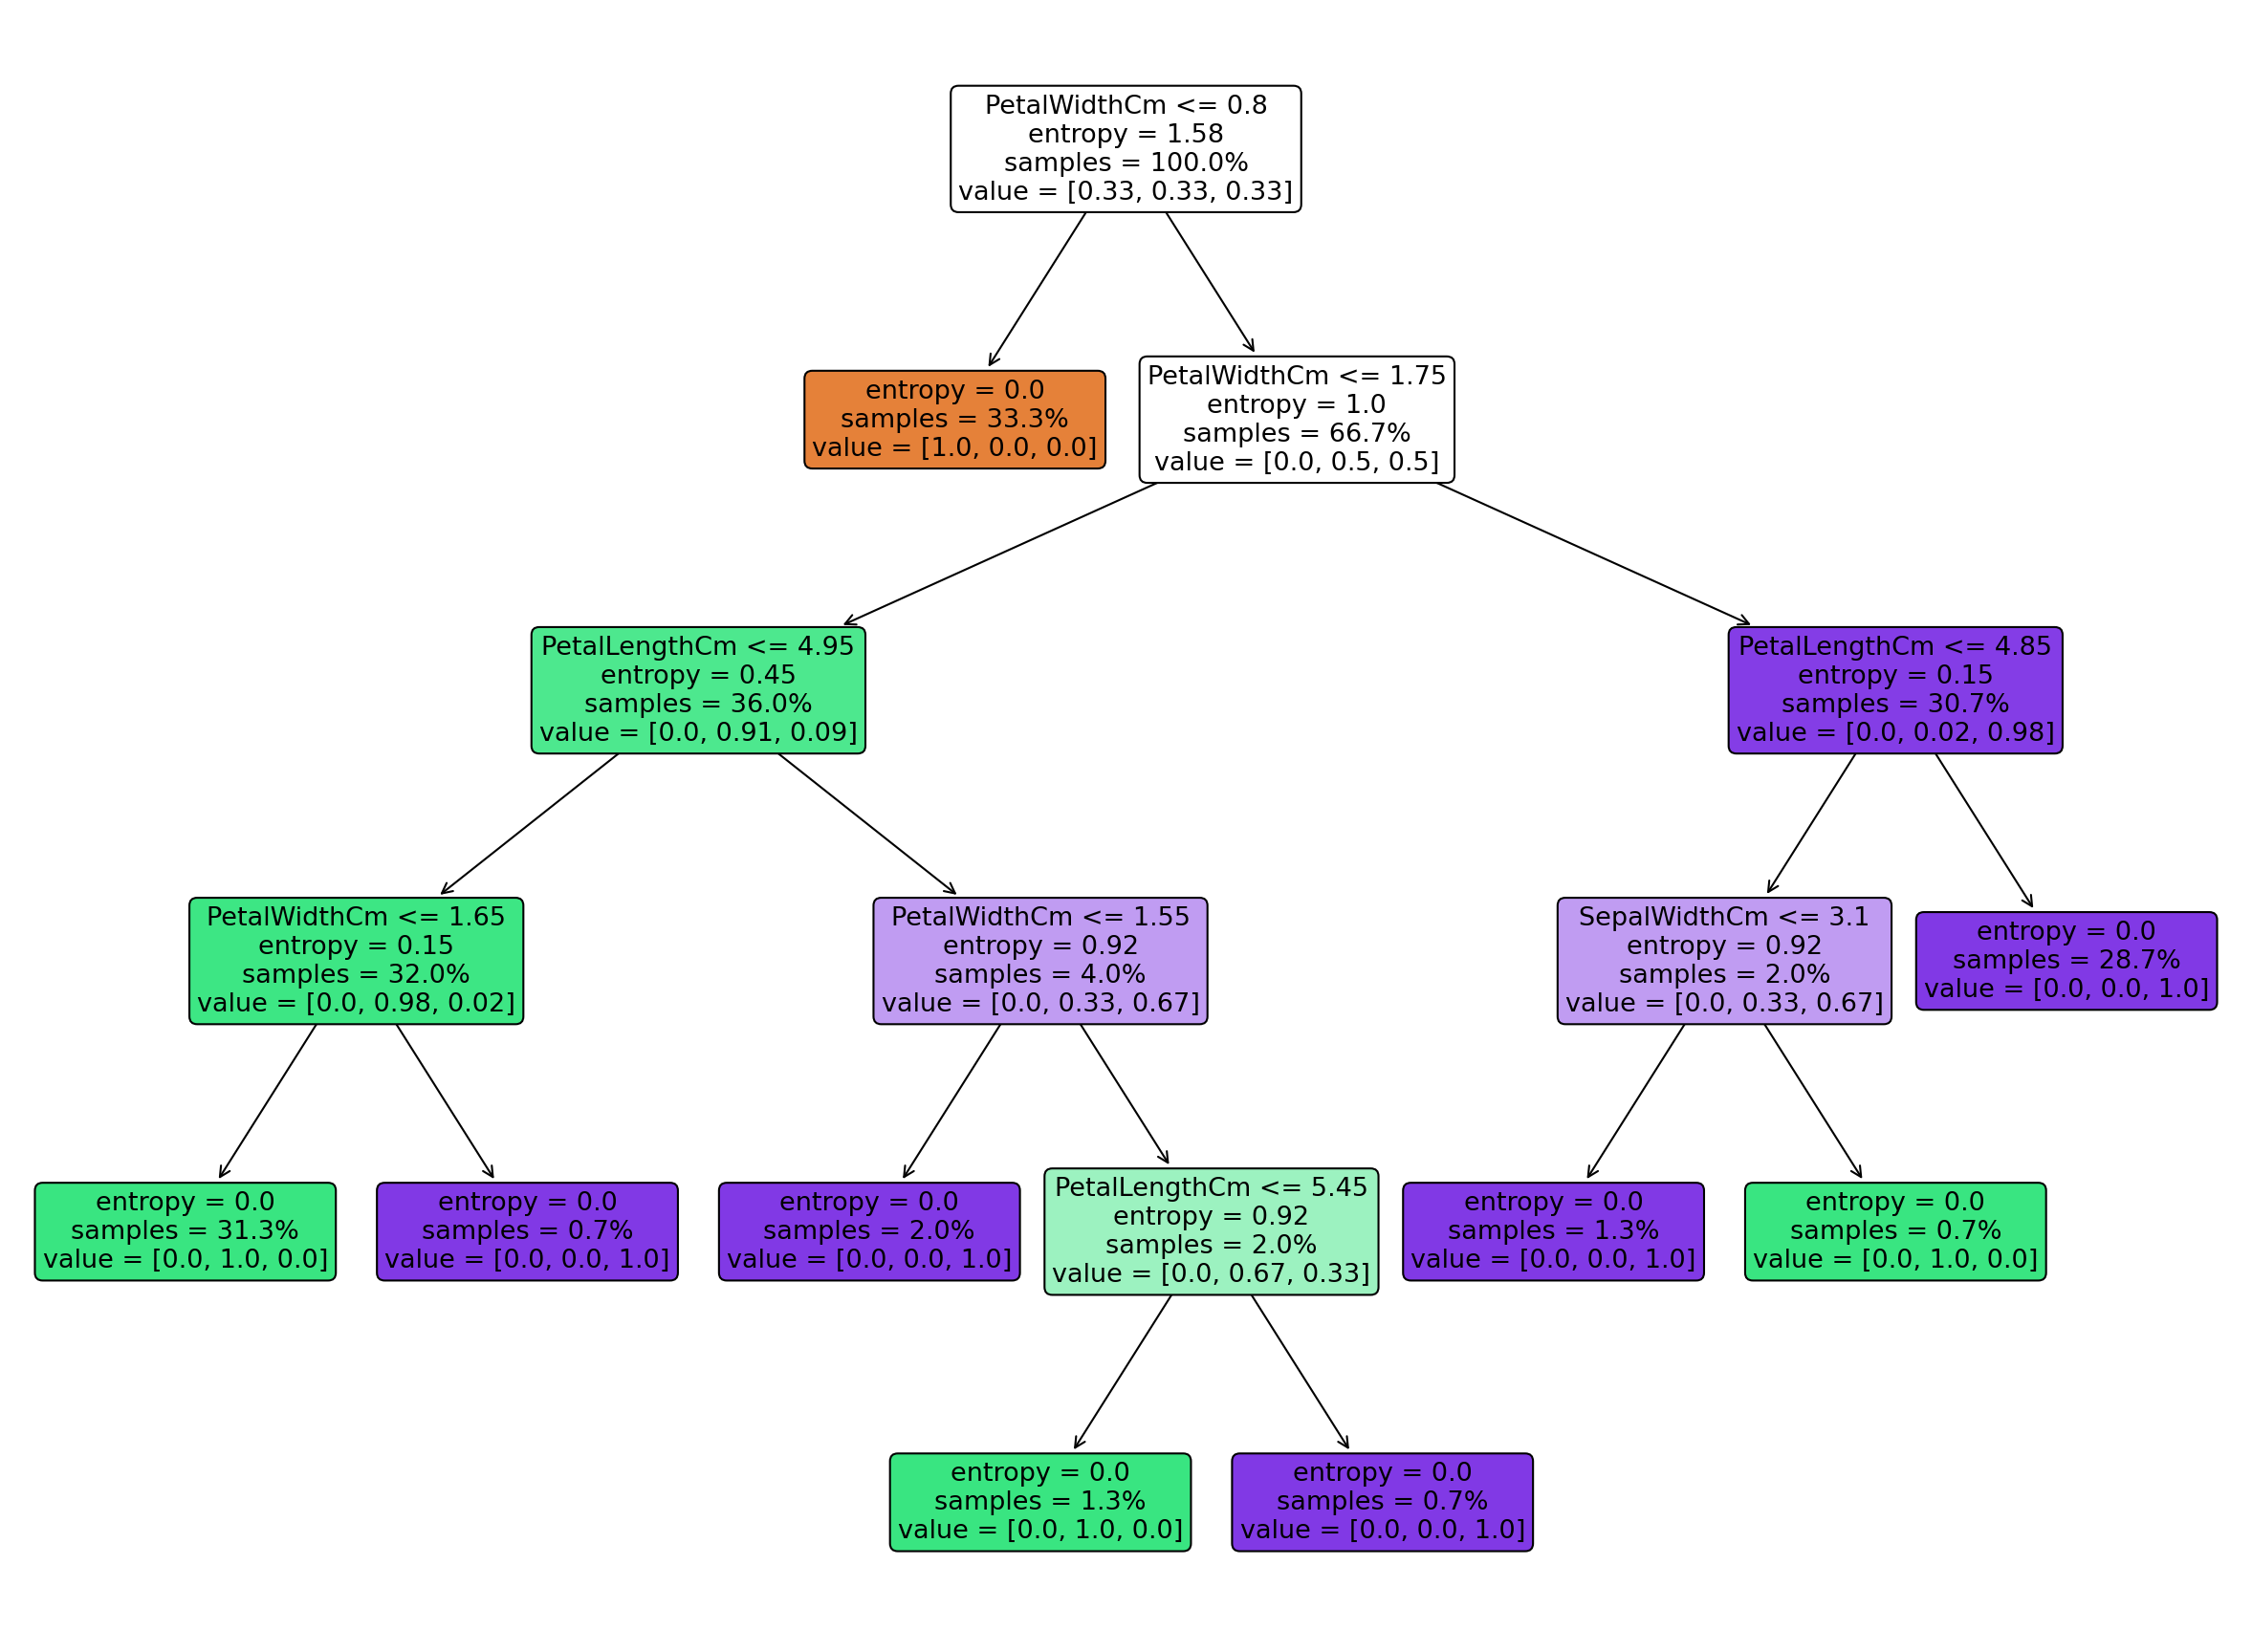

In [33]:
from sklearn import tree
plt.figure(figsize = (20,15), facecolor = 'white', dpi = 150)
clfr.fit(x, y)
tree_plt = tree.plot_tree(clfr, feature_names = ft_columns, fontsize = 13, precision = 2, filled = True, proportion = True, rounded = 10)
plt.show()